# AIN429 Data Mining Lab PROJECT

Project title=***FRAUD*** ***DETECTION***

Name=Zeynep Hafsa DİLMAÇ

Id=21992905

Class=AIN429

***Project aim:***In this project, I covered the detection of fraud in onile payments. Nowadays, online payments are used a lot due to the fact that online shopping is easier. Fraud, on the other hand, is encountered in online payments as well as everywhere else. So how can we determine this? In this project, we will discuss this issue in detail.At first, I took a look at the studies on this subject and found a suitable dataset from kaggle that I can use on this subject.

***Dataset***
The dataset has 11 columns 
and at the same time, the data consists of more than 100 thousand rows. The columns 
and their explanations are as follows;
1. step: represents a unit of time where 1 step equals 1 hour 
2. type: type of online transaction 
3. amount: the amount of the transaction 
4. nameOrig: customer starting the transaction 
5. oldbalanceOrg: balance before the transaction 
6. newbalanceOrig: balance after the transaction 
7. nameDest: recipient of the transaction 
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction 
10. isFraud: fraud transaction

Output: isFraud

***Process:***First of all, the dataset was a labeled dataset, and as a result, I needed to give 0(notfraud) or 1(fraud) labels, so I should use classification methods. I determined 3 different models, they became KNN, Decision Tree and Random Forest models. All three are common models that are widely used in classification. In the following steps, I will first moan the dataset and then I will make the dataset suitable for use in these models. Finally, I will make predictions on the models and compare the results.


In [1]:
#importing required libraries
#In this step, I called all the libraries that I will need and use in the next steps.
import pandas as pd
import numpy as np
import plotly.express as px
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#connect drive
from google.colab import  drive 
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
#unzipping folders
! unzip "drive/MyDrive/datafraud.zip" -d data

Archive:  drive/MyDrive/datafraud.zip
  inflating: data/PS_20174392719_1491204439457_log.csv  


In [4]:
os.rename("data/PS_20174392719_1491204439457_log.csv","data/fraud.csv")

In [5]:
#Let's read the dataset and take a look at the dataset.
data = pd.read_csv("data/fraud.csv")
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [6]:
data.shape

(6362620, 11)

The dataset consists of 60-odd rows and 11 columns. Let's check if there are any nan values in these lines

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#We see that there are no null values.
#Let's examine the relationship of the columns with each other, we can use the correlation table for this.
data.corr()

step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
oldbalanceDest        1.000000        0.976569 -0.005885       -0.000513  
newbalanceDest        0.976569        1.000000  0.000535       -0.000529  
isFraud              -0.005885        0.000535  1.000000        0.044109  
isFlaggedFraud       -0.000513       -0.000529  0.044109        1.000000

In [30]:
data.describe()

step          type        amount  oldbalanceOrg  \
count  6.362620e+06  6.362620e+06  6.362620e+06   6.362620e+06   
mean   2.433972e+02  1.714150e+00  1.798619e+05   8.338831e+05   
std    1.423320e+02  1.350117e+00  6.038582e+05   2.888243e+06   
min    1.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    1.560000e+02  1.000000e+00  1.338957e+04   0.000000e+00   
50%    2.390000e+02  1.000000e+00  7.487194e+04   1.420800e+04   
75%    3.350000e+02  3.000000e+00  2.087215e+05   1.073152e+05   
max    7.430000e+02  4.000000e+00  9.244552e+07   5.958504e+07   

       newbalanceOrig  oldbalanceDest  newbalanceDest       isFraud  \
count    6.362620e+06    6.362620e+06    6.362620e+06  6.362620e+06   
mean     8.551137e+05    1.100702e+06    1.224996e+06  1.290820e-03   
std      2.924049e+06    3.399180e+06    3.674129e+06  3.590480e-02   
min      0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00   
25%      0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00   
50%      0.000000e+00    1.327057e+05    2.146614e+05  0.000000e+00   
75%      1.442584e+05    9.430367e+05    1.111909e+06  0.000000e+00   
max      4.958504e+07    3.560159e+08    3.561793e+08  1.000000e+00   

       isFlaggedFraud  
count    6.362620e+06  
mean     2.514687e-06  
std      1.585775e-03  
min      0.000000e+00  
25%      0.000000e+00  
50%      0.000000e+00  
75%      0.000000e+00  
max      1.000000e+00

In [9]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

When we examine the type of columns in the dataset, we see that three columns have object values, but two of these columns have very different string values and are of no use to us. That's why I deleted these columns from the dataset. The Type column has 5 different values, so we must convert the object type to an integer type. For this, I used the labelencoder.

In [11]:
#Here, let's examine how the data is distributed according to the type column in the dataset.
type_transaction = data["type"].value_counts()
transaction = type_transaction.index
quantity = type_transaction.values

# plotting pie chart
fig = px.pie(data,
            values = quantity,
            names = transaction, 
            hole = 0.4,
            title = "Distribution of Transaction Type")
fig.show()

In [12]:
le = preprocessing.LabelEncoder()
le.fit(data['type'])
data['type']=le.transform(data['type'])
data.head(10)

step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     3   9839.64  C1231006815      170136.00       160296.36   
1     1     3   1864.28  C1666544295       21249.00        19384.72   
2     1     4    181.00  C1305486145         181.00            0.00   
3     1     1    181.00   C840083671         181.00            0.00   
4     1     3  11668.14  C2048537720       41554.00        29885.86   
5     1     3   7817.71    C90045638       53860.00        46042.29   
6     1     3   7107.77   C154988899      183195.00       176087.23   
7     1     3   7861.64  C1912850431      176087.23       168225.59   
8     1     3   4024.36  C1265012928        2671.00            0.00   
9     1     2   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0               0  
1  M2044282225             0.0            0.00        0               0  
2   C553264065             0.0            0.00        1               0  
3    C38997010         21182.0            0.00        1               0  
4  M1230701703             0.0            0.00        0               0  
5   M573487274             0.0            0.00        0               0  
6   M408069119             0.0            0.00        0               0  
7   M633326333             0.0            0.00        0               0  
8  M1176932104             0.0            0.00        0               0  
9   C195600860         41898.0        40348.79        0               0

In [13]:
data.drop(columns=["nameOrig","nameDest"],inplace=True)
data.head()

step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     3   9839.64       170136.0       160296.36             0.0   
1     1     3   1864.28        21249.0        19384.72             0.0   
2     1     4    181.00          181.0            0.00             0.0   
3     1     1    181.00          181.0            0.00         21182.0   
4     1     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0

We have done all our inspections and modifications on the dataset. Now we need to scale and split the data to make it ready for models.

In [14]:
# Scaling data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x =  pd.DataFrame(sc_X.fit_transform(data.drop(["isFraud"],axis = 1)))
#x = np.array(data.drop(columns=["isFraud"]))
y = data["isFraud"]

In [15]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42)

# DECISION TREE

In [16]:
# fit the training data in model

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.9997271564229829


In [17]:
data[data.isFraud==1]

step  type      amount  oldbalanceOrg  newbalanceOrig  \
2           1     4      181.00         181.00             0.0   
3           1     1      181.00         181.00             0.0   
251         1     4     2806.00        2806.00             0.0   
252         1     1     2806.00        2806.00             0.0   
680         1     4    20128.00       20128.00             0.0   
...       ...   ...         ...            ...             ...   
6362615   743     1   339682.13      339682.13             0.0   
6362616   743     4  6311409.28     6311409.28             0.0   
6362617   743     1  6311409.28     6311409.28             0.0   
6362618   743     4   850002.52      850002.52             0.0   
6362619   743     1   850002.52      850002.52             0.0   

         oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
2                  0.00            0.00        1               0  
3              21182.00            0.00        1               0  
251                0.00            0.00        1               0  
252            26202.00            0.00        1               0  
680                0.00            0.00        1               0  
...                 ...             ...      ...             ...  
6362615            0.00       339682.13        1               0  
6362616            0.00            0.00        1               0  
6362617        68488.84      6379898.11        1               0  
6362618            0.00            0.00        1               0  
6362619      6510099.11      7360101.63        1               0  

[8213 rows x 9 columns]

Looking at the dataset again, I see that class 1 has very few instances in the data.That is, the data had an imbalanced distribution. Oversampling or undersampling is performed on such distributed data. Therefore, as long as it mostly gives 0 in each model, very good accuracy is obtained. To fix this, I will first overampling the dataset. Afterwards, when evaluating the results, accuracy is not a correct expression, so I will use precision and recall values.

OVERSAMPLING-UNDERSAMPLING ***DATA***

nadir sınıf örneklerinin kaybetmemek için oversampling daha iyidir.

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x, y)
#splitting again
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,random_state = 42)

In [29]:
X_resampled
#Here we see that our data has almost doubled in size with oversampling.

0         1         2         3         4         5  \
0        -1.703042  0.952399 -0.281560 -0.229810 -0.237622 -0.323814   
1        -1.703042  0.952399 -0.294767 -0.281359 -0.285812 -0.323814   
2        -1.703042  1.693076 -0.297555 -0.288654 -0.292442 -0.323814   
3        -1.703042 -0.528954 -0.297555 -0.288654 -0.292442 -0.317582   
4        -1.703042  0.952399 -0.278532 -0.274329 -0.282221 -0.323814   
...            ...       ...       ...       ...       ...       ...   
12708809  3.376633 -0.528954 -0.149069 -0.257609 -0.292442 -0.323814   
12708810  0.699792 -0.528954  1.030963 -0.010894 -0.292442 -0.309209   
12708811  1.170522  1.693076  1.145772  0.013109 -0.292442 -0.323814   
12708812 -0.276798  1.693076 -0.163313 -0.260587 -0.292442 -0.323814   
12708813 -1.323647  1.693076 -0.020115 -0.230648 -0.292442 -0.323814   

                 6         7  
0        -0.333411 -0.001586  
1        -0.333411 -0.001586  
2        -0.333411 -0.001586  
3        -0.333411 -0.001586  
4        -0.333411 -0.001586  
...            ...       ...  
12708809 -0.308958 -0.001586  
12708810 -0.101503 -0.001586  
12708811 -0.333411 -0.001586  
12708812 -0.333411 -0.001586  
12708813 -0.333411 -0.001586  

[12708814 rows x 8 columns]

In [20]:
# fit the training data in model
s=time.time()
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
pred=model.predict(x_test)
time.sleep(1)
f=time.time()
decisiontreetime=f-s
print(classification_report(y_test,pred))

0.9999159638474583
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588353
           1       1.00      1.00      1.00   1588851

    accuracy                           1.00   3177204
   macro avg       1.00      1.00      1.00   3177204
weighted avg       1.00      1.00      1.00   3177204



Text(0.5, 15.0, 'Predicted label')

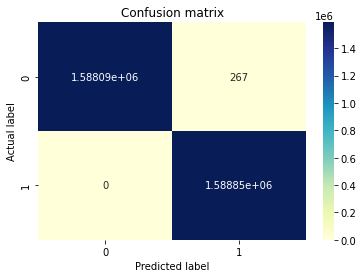

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test, pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# KNN

In [22]:
#Setup a knn classifier with k neighbors
s1=time.time()
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))
y_predknn = knn.predict(x_test)
time.sleep(1)
f1=time.time()
knntime=f1-s1

0.999598074281664


Text(0.5, 15.0, 'Predicted label')

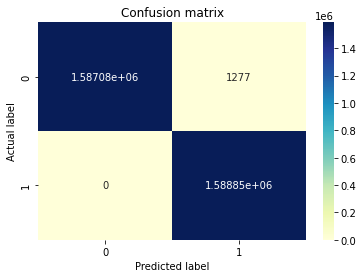

In [23]:

cnf_matrix = metrics.confusion_matrix(y_test, y_predknn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
#import classification_report
print(classification_report(y_test,y_predknn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588353
           1       1.00      1.00      1.00   1588851

    accuracy                           1.00   3177204
   macro avg       1.00      1.00      1.00   3177204
weighted avg       1.00      1.00      1.00   3177204



# RANDOM FOREST

In [25]:
s2=time.time()
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
y_predrf = classifier.predict(x_test)
print(classifier.score(x_test,y_predrf))
time.sleep(1)
f2=time.time()
randomforesttime=f2-s2
print(classification_report(y_test,y_predrf))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588353
           1       1.00      1.00      1.00   1588851

    accuracy                           1.00   3177204
   macro avg       1.00      1.00      1.00   3177204
weighted avg       1.00      1.00      1.00   3177204



Text(0.5, 15.0, 'Predicted label')

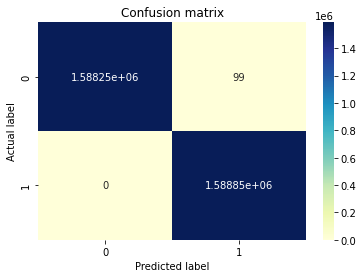

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predrf)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
print("Running Time of Decision tree: ",f-s)
print("Running Time of KNN: ",f1-s1)
print("Running Time of Random Forest: ",f2-s2)

Running Time of Decision tree:  68.97975754737854
Running Time of KNN:  2833.1801121234894
Running Time of Random Forest:  412.7918643951416


# ***COMPARE and CONCLUSİON***
If we compare the running times of the algorithms, we see that the fastest decision tree model and the slowest KNN model work. There was not much difference between the running times of the random forest and the decision tree model, which shows that when we have to choose a model among them, it will not cost us much time to choose the good one. however, the situation is slightly different. The model gave very slow results, so we could not try this model with different k values. If a choice has to be made between the others, this model should not be chosen unless there is a very obvious difference. We got almost 1 inaccuracy on all of our models. This is a very good result. While other models gave 0.999 odd results, the random forest model gave a direct result of 1 accuracy. When we look at the confusion matrices, we can actually make a more beautiful and detailed analysis. In all models, we see that labels with a true value of 1 are never labeled with a 0 label (FN=0). The differences in the models are seen in the FP values. Although the real value is 0, the estimated number of values as 1 is 267 in the Decision Tree model and 1277 in the KNN model. This shows us that the decision tree model is a better predictive model than the Knn model. The same value is only 99 in the Random Forest model. So in total, only 99 values' labels were guessed incorrectly. This shows that this model is the best predictive model among them.

# ***WHY RANDOM FOREST BEST?***
Random Forest is an ensemble learning method that combines multiple decision trees to improve the overall accuracy of the model. It creates a set of decision trees and combines their predictions to arrive at a final output.

The main advantage of Random Forest over KNN and Decision Tree is that it reduces overfitting. Decision tree models tend to overfit when the tree is too deep and has too many leaves. KNN also suffers from overfitting when the number of nearest neighbors is too high. Random Forest reduces overfitting by averaging the predictions of multiple decision trees, which leads to a more robust model. Additionally, Random Forest also handles missing values and outliers better than KNN and Decision Tree, which can also improve the accuracy of the model.

Furthermore, Random Forest also provides feature importance, which can help identify which features are important in the classification process, which can be very useful when working with high-dimensional data.

In summary, Random Forest generally provides better accuracy results than KNN and Decision Tree because it reduces overfitting, handles missing values and outliers well, and provides feature importance.
